*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [2]:
# import some basic libraries
import os
import pandas as pd


os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features with the original dataset

In [3]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [4]:
# Adding the 'post_type' column from H2_data to combined_df
original_df = original_df.merge(H2_data[['post_type']], on='post_id', how='left')

original_df.head(5)

KeyError: 'post_id'

In [62]:
#read the excel file into a dataframe
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
#to check the first few rows of the dataframe, you can use
print(H2_data.head())

                      profile  nr_reactions  nr_comments  nr_shares  \
0  wild adventures theme park            16            2          2   
1            fun spot america            38            1          2   
2            fun spot america            23            2          3   
3            disneyland paris           646           52         12   
4       silverwood theme park            17            2          0   

   comments/post post_interaction_rate    engagement  nr_likes  \
0              2              1,09E+12  1.090000e+12        13   
1              1              4,17E+11  4.170000e+11        33   
2              2              2,85E+11  2.850000e+11        21   
3             56              1,36E+11  1.360000e+11       478   
4              2              4,96E+11  4.960000e+11        16   

                           post_id  followers  post_type  
0      84679583132_770120045161180         66          1  
1     184020466977_767286052104076     100000          3  

In [63]:
# Merge 'combined_df' with 'level2_df' on the 'profile' column
combined_df = df.merge(H2_data, on='post_id', how='left')
#show combined_df
combined_df.head()

,date,profile_x,message,nr_reactions_x,nr_comments_x,nr_shares_x,comments/post_x,post_interaction_rate_x,engagement_x,nr_likes_x,...,profile_y,nr_reactions_y,nr_comments_y,nr_shares_y,comments/post_y,post_interaction_rate_y,engagement_y,nr_likes_y,followers_y,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,...,wild adventures theme park,16,2,2,2,"1,09E+12",1.090000e+12,13,66,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,...,fun spot america,38,1,2,1,"4,17E+11",4.170000e+11,33,100000,3
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,...,fun spot america,23,2,3,2,"2,85E+11",2.850000e+11,21,100000,2
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,...,disneyland paris,646,52,12,56,"1,36E+11",1.360000e+11,478,5200000,1
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,...,silverwood theme park,17,2,0,2,"4,96E+11",4.960000e+11,16,381000,2


In [64]:
# Merge 'combined_df' with 'H2_data' on the 'post_id' column
combined_df = combined_df.merge(H2_data, on='post_id', how='left')

# Get a list of duplicate columns
duplicate_columns = [col for col in combined_df.columns if '_x' in col or '_y' in col]

# Drop the duplicate columns
combined_df.drop(columns=duplicate_columns, inplace=True)

# Show combined_df
combined_df.head()


,date,message,link_posts,picture_posts,video_posts,profile_id,post_id,link,profile,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,followers
0,12/31/23 9:40 PM,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,wild adventures theme park,16,2,2,2,"1,09E+12",1.090000e+12,13,66
1,12/31/23 8:01 PM,See you next year! 😉 Don’t miss...,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,fun spot america,38,1,2,1,"4,17E+11",4.170000e+11,33,100000
2,12/31/23 7:30 PM,Don't miss our HUGE firework display ! 🥳\n\n#f...,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,fun spot america,23,2,3,2,"2,85E+11",2.850000e+11,21,100000
3,12/31/23 7:00 PM,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,disneyland paris,646,52,12,56,"1,36E+11",1.360000e+11,478,5200000
4,12/31/23 7:00 PM,It's the last day of our New Year's Sale! Save...,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,silverwood theme park,17,2,0,2,"4,96E+11",4.960000e+11,16,381000


In [65]:
# Check the column names in both DataFrames
print("Columns in combined_df:", combined_df.columns)
print("Columns in H2_data:", H2_data.columns)

# Verify if the column you're expecting exists in the merged DataFrame
expected_column = 'post_type'
if expected_column in combined_df.columns:
    print("Column '{}' exists in combined_df.".format(expected_column))
else:
    print("Column '{}' does not exist in combined_df.".format(expected_column))


Columns in combined_df: Index(['date', 'message', 'link_posts', 'picture_posts', 'video_posts',
       'profile_id', 'post_id', 'link', 'profile', 'nr_reactions',
       'nr_comments', 'nr_shares', 'comments/post', 'post_interaction_rate',
       'engagement', 'nr_likes', 'followers'],
      dtype='object')
Columns in H2_data: Index(['profile', 'nr_reactions', 'nr_comments', 'nr_shares', 'comments/post',
       'post_interaction_rate', 'engagement', 'nr_likes', 'post_id',
       'followers', 'post_type'],
      dtype='object')
Column 'post_type' does not exist in combined_df.


In [68]:
#merging the 2 csv files into 1 single table

#concatenate the DataFrames along the rows
new_df = pd.concat([H2_data, H4_data], ignore_index=True)
#to verify the combined DataFrame
new_df.head(10)

,profile,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,post_id,followers,post_type,date,message,link_posts,picture_posts,video_posts,profile_id,link,has_emoji
0,wild adventures theme park,16,2,2,2,"1,09E+12",1.090000e+12,13,84679583132_770120045161180,66.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fun spot america,38,1,2,1,"4,17E+11",4.170000e+11,33,184020466977_767286052104076,100000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fun spot america,23,2,3,2,"2,85E+11",2.850000e+11,21,184020466977_767267948772553,100000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,disneyland paris,646,52,12,56,"1,36E+11",1.360000e+11,478,652389081615295_775974521237956,5200000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,silverwood theme park,17,2,0,2,"4,96E+11",4.960000e+11,16,762701550509617_678920137770716,381000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,belmont park,51,1,11,1,0.0012457732692649937,1.245773e-03,40,83231004302_767257582104974,51000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,seaworld orlando,729,25,97,28,0.0035718617597483805,3.571862e-03,459,1782696285170057_377301148304978,267000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,canada's wonderland,102,9,14,13,"1,51E+12",1.510000e+12,88,95469803923_775191387982844,837016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,seaworld san diego,242,5,15,5,0.002332185043750723,2.332185e-03,182,426111667814056_689815569963071,127000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,lake compounce,60,3,5,3,"4,14E+12",4.140000e+12,46,80018245271_791501566346367,166000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
folder_path = '02_new dataframes'
dfs = []

# Define data type conversions for specific columns
dtype_conversions = {'has_emoji': int}  # Replace 'column_name' with the actual column name and data type

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, dtype=dtype_conversions)  # Apply data type conversions
        dfs.append(df)

# Concatenate DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Drop columns with all NaN values
merged_df.dropna(axis=1, how='all', inplace=True)


merged_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,has_emoji,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66,1.0,NaN
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000,1.0,NaN
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000,1.0,NaN
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,5200000,1.0,NaN
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,"4,96E+11",4.960000e+11,16,NaN,NaN,1.0,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,381000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30881,NaN,wild adventures theme park,NaN,20,1,0,2,"1,25E+11",1.250000e+11,20,NaN,NaN,NaN,NaN,84679583132_10159284713193133,NaN,66,NaN,1.0
30882,NaN,playland,NaN,7,1,0,1,"2,46E+09",2.460000e+09,7,NaN,NaN,NaN,NaN,170865866397863_2401446080006486,NaN,23000,NaN,1.0
30883,NaN,disneyland paris,NaN,833,40,31,44,"1,75E+12",1.750000e+12,621,NaN,NaN,NaN,NaN,652389081615295_2176203019233886,NaN,5200000,NaN,2.0
30884,NaN,six flags over georgia & hurricane harbor,NaN,58,7,2,9,"1,42E+12",1.420000e+12,49,NaN,NaN,NaN,NaN,34284255238_10160187479800239,NaN,479000,NaN,1.0


In [70]:
# Define the folder path
folder_path = '02_new dataframes'

# Initialize an empty list to store DataFrames
dfs = []

# Read the first CSV file (H2_dataframe.csv)
file_path_h2 = os.path.join(folder_path, 'H2_dataframe.csv')
df_h2 = pd.read_csv(file_path_h2, delimiter=';')
dfs.append(df_h2)

# Read the second CSV file (H4_dataframe.csv)
file_path_h4 = os.path.join(folder_path, 'H4_dataframe.csv')
df_h4 = pd.read_csv(file_path_h4, delimiter=';')
dfs.append(df_h4)

# Concatenate the DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame
print(merged_df)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 341, saw 2


# FIRST TRY WITH PYMER (dont touch pls :*)

## **1. Loading the data**

Loading the cleaned dataset 'combined_themepark_dataset.csv' into a pandas DataFrame.

In [5]:
# Get the directory of the current Jupyter Notebook file
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Specify the relative path to the folder containing the CSV file
folder_path = os.path.join(notebook_directory, '02_new dataframes')

# Specify the file name
file_name = 'H4_dataframe.csv'

# Construct the full path to the CSV file
csv_file_path = os.path.join(folder_path, file_name)

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Print the first few rows of the DataFrame to verify that it was read successfully
df.head(4)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,"1,09E+12",1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,66.0,1
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,"4,17E+11",4.170000e+11,33,NaN,NaN,NaN,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,100000.0,1
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,"2,85E+11",2.850000e+11,21,NaN,NaN,1.0,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,100000.0,1
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,"1,36E+11",1.360000e+11,478,NaN,1.0,NaN,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,NaN,1


### **2. Creating and fitting a multi-level model**

In [ ]:
from pymer4.models import Lmer

# Define the formula for the multilevel regression model
formula = 'engagement ~ nr_reactions + has_emoji + (1|profile)'

# Create an instance of the Lmer model
model = Lmer(formula, data=df)

# Fit the model to the data
model.fit()

# Print a summary of the fitted model
print(model.summary())

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~nr_reactions+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 15443	 Groups: {'profile': 59.0}

Log-likelihood: -449430.218 	 AIC: 898870.435

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.694048e+22  2.948567e+11
Residual               1.108398e+24  1.052805e+12

No random effect correlations specified

Fixed effects:

Linear mixed model fit by REML [’lmerMod’]
Formula: engagement~nr_reactions+has_emoji+(1|profile)

Family: gaussian	 Inference: parametric

Number of observations: 15443	 Groups: {'profile': 59.0}

Log-likelihood: -449430.218 	 AIC: 898870.435

Random effects:

                 Name           Var           Std
profile   (Intercept)  8.694048e+22  2.948567e+11
Residual               1.108398e+24  1.052805e+12

No random effect correlations specified

Fixed effects:

                  Estimate        2.5_ci       97.5_ci      

In [ ]:
# Get population level coefficients
print(model.coefs)

                  Estimate        2.5_ci       97.5_ci            SE  \
(Intercept)   7.600720e+11  6.787333e+11  8.414106e+11  4.150007e+10   
nr_reactions -7.354422e+06 -1.196241e+07 -2.746437e+06  2.351056e+06   
has_emoji    -1.079017e+10 -4.954297e+10  2.796263e+10  1.977220e+10   

                        DF     T-stat         P-val  Sig  
(Intercept)   6.377618e+01  18.314958  4.306195e-27  ***  
nr_reactions  5.317836e+06  -3.128136  1.759199e-03   **  
has_emoji     1.534580e+05  -0.545724  5.852564e-01       


In [ ]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
print(model.fixef.head(5))

                                  (Intercept)  nr_reactions     has_emoji
acn - america's coaster network  1.078562e+11 -7.354422e+06 -1.079017e+10
adventure city                   9.373215e+11 -7.354422e+06 -1.079017e+10
belmont park                     9.494745e+11 -7.354422e+06 -1.079017e+10
big kahuna's nj                  6.397893e+11 -7.354422e+06 -1.079017e+10
busch gardens tampa bay          1.164889e+12 -7.354422e+06 -1.079017e+10


In [ ]:
# Get group level deviates from population level coefficients (i.e. rfx)
print(model.ranef.head(5))

                                 X.Intercept.
acn - america's coaster network -6.522157e+11
adventure city                   1.772496e+11
belmont park                     1.894026e+11
big kahuna's nj                 -1.202826e+11
busch gardens tampa bay          4.048167e+11


<Axes: xlabel='Estimate'>

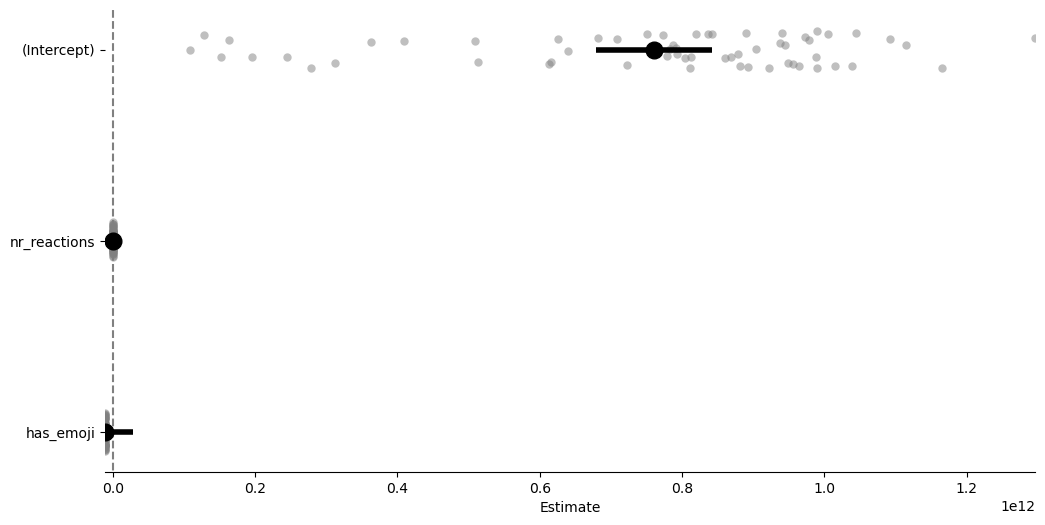

In [ ]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

<Axes: xlabel='has_emoji', ylabel='predicted engagement'>

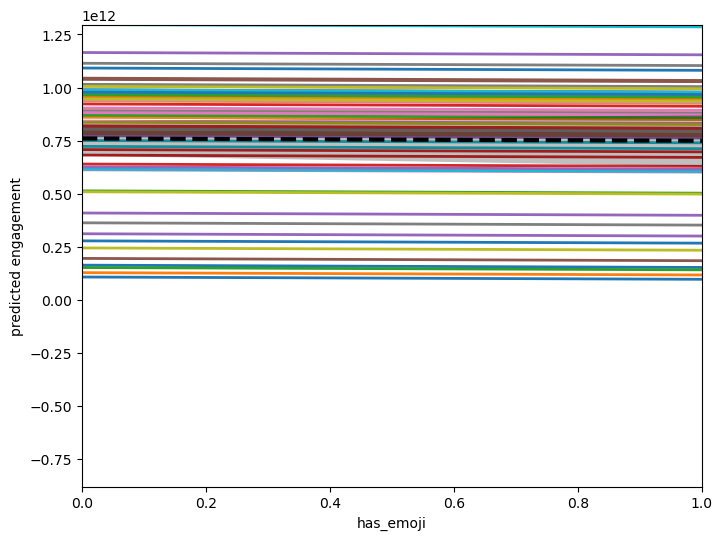

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

## **3. Interpretation**